<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Estadistica_e_InferenciaCausal/Semana5/Notebooks/Red_Bayesiana_Sobrevivientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyagrum  # permite utilizar biblioteca C++ aGrUM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.4 MB/s 


In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
%matplotlib inline


## Modeloando las características de los sobrevivientes del Titanic

In [5]:

bn = gum.BayesNet("Sobrevivientes")
bn =gum.fastBN("Age;Gender;Relatives; Pclass; Embarked; Survived")

bn

(pyAgrum.BayesNet<double>@0x3c9f600) BN{nodes: 6, arcs: 0, domainSize: 64, dim: 12}

De lo que sabemos del Titanic ¿qué modelo gráfico podríamos construir para explicar la sobrevivencia de los pasajeros?

In [7]:

bn =gum.fastBN("Age;Gender->Survived<-Pclass<-Embarked ;Relatives")

bn

(pyAgrum.BayesNet<double>@0x3ee2000) BN{nodes: 6, arcs: 3, domainSize: 64, dim: 20}

## Modelo bayesiano que aprende de un conjunto de datos

El conjunto de datos tiene su origen en los datos ofrecidos por [Kaggle](https://www.kaggle.com/c/titanic/data). 



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:

learner = gum.BNLearner('/content/drive/MyDrive/Datos/Titanic Kaggle/titanic_rb.csv')
bn = learner.learnBN()
bn

(pyAgrum.BayesNet<double>@0x5121600) BN{nodes: 6, arcs: 8, domainSize: 576, dim: 94}

La red muestra las dependencias probabilísticas entre las variables, así como las independencias condicionales de una variable dada(s) otra(s) variable(s). 

$\mathbb{P} ( S\mid G,PC,E,A,R ) = \mathbb{P}( S\mid G,PC)$

$\mathbb{P} ( G\mid PC,E, A,R ) = \mathbb{P}( G\mid E,R)$

In [ ]:
print(bn.variable("Age"))

Age:Labelized(<adult,baby,kid,old,teen,toddler>)


### Exploración de datos.


Podemos ver la tabla de probabilidad condicional de cada variable usando la función cpt (contditional probability table)

In [13]:
bn.cpt('Survived') #conditional probability table de la varible "Survived"

(pyAgrum.Potential<double>@0x3830fe0) 
             ||  Survived         |
Gender|Pclass||False    |True     |
------|------||---------|---------|
Female|1     || 0.0214  | 0.9786  |
Male  |1     || 0.7484  | 0.2516  |
Female|2     || 0.0573  | 0.9427  |
Male  |2     || 0.9002  | 0.0998  |
Female|3     || 0.3335  | 0.6665  |
Male  |3     || 0.9045  | 0.0955  |

In [14]:
bn.cpt('Gender')

(pyAgrum.Potential<double>@0x3ed5040) 
             ||  Gender           |
Relati|Embark||Female   |Male     |
------|------||---------|---------|
False |      || 0.9706  | 0.0294  |
True  |      || 0.5000  | 0.5000  |
False |C     || 0.2965  | 0.7035  |
True  |C     || 0.5407  | 0.4593  |
False |Q     || 0.4898  | 0.5102  |
True  |Q     || 0.4801  | 0.5199  |
False |S     || 0.1875  | 0.8125  |
True  |S     || 0.5209  | 0.4791  |

C = Cherbourg, Q = Queenstown, S = Southampton

y la distribución de cada variable en nuestra base de datos

In [46]:
gnb.sideBySide(bn, gnb.getInference(bn))

### Inferencia (propagación de probabilidades)

Propagación los efectos de la evidencia a través de la red para conocer la probabilidad a posteriori de las variables dadas las variables conocidas

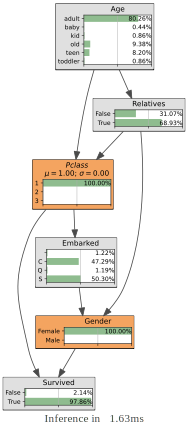

In [15]:
gnb.showInference(bn,evs={"Gender": "Female", "Pclass": "1"}, size="6") 

** pyAgrum** For better visualizations, please install matplotlib-inline.


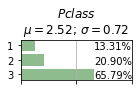

In [26]:
#Probabilidad de la clase en la que viajan los adolecentes.

gnb.showPosterior(bn,evs={ "Age": 'teen'},target='Pclass')


** pyAgrum** For better visualizations, please install matplotlib-inline.


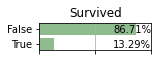

In [17]:
# Probabilidad de sobrevivencia de los Hombres adultos:

gnb.showPosterior(bn,evs={"Gender": "Male"},target='Survived')

** pyAgrum** For better visualizations, please install matplotlib-inline.


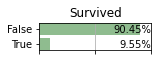

In [18]:
# Probabilidad de sobrevivencia de los adolescentes en tercera clase:

gnb.showPosterior(bn,evs={"Gender": "Male", "Age": "teen", "Pclass": "3"},target='Survived')

** pyAgrum** For better visualizations, please install matplotlib-inline.


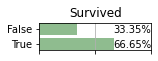

In [19]:
#Probabilidad de sobrevivencia de las mujeres en tercera clase:
gnb.showPosterior(bn,evs={"Gender": "Female", "Pclass": "3"},target='Survived')

In [ ]:
gum.saveBN(bn, "RedBayesiana_titanic.bif")

# Modelo bayesiano a partir de conocimiento previo



In [47]:
# creamos el modelo donde la variable dependiente (Sobreviviencia) esta
# condicionada a las otras variables que son independientes entre ellas
bn = gum.BayesNet("Sobrevivientes")
bn =gum.fastBN("Edad{menor|adulto|mayor}->Sobrevivencia{No|Sí}<-Sexo{Mujer|Hombre};Familiares{No|Sí}->Sobrevivencia")
print(bn.variable("Sobrevivencia"))
print(bn.variable("Edad"))
print(bn.variable("Sexo"))
print(bn.variable("Familiares"))

bn

Sobrevivencia:Labelized(<No,Sí>)
Edad:Labelized(<menor,adulto,mayor>)
Sexo:Labelized(<Mujer,Hombre>)
Familiares:Labelized(<No,Sí>)


(pyAgrum.BayesNet<double>@0x511f800) BN{nodes: 4, arcs: 3, domainSize: 24, dim: 31}

In [56]:


bn.cpt('Edad').fillWith([ 0.38, 0.43, 0.19])
bn.cpt('Edad')

(pyAgrum.Potential<double>@0x4765980) 
  Edad                       |
menor    |adulto   |mayor    |
---------|---------|---------|
 0.3800  | 0.4300  | 0.1900  |

In [61]:
bn.cpt('Sexo').fillWith( [.80, .20])
bn.cpt('Sexo')

(pyAgrum.Potential<double>@0x4765a60) 
  Sexo             |
Mujer    |Hombre   |
---------|---------|
 0.8000  | 0.2000  |

In [65]:
bn.cpt('Familiares').fillWith([ .25, .75])
bn.cpt('Familiares')

(pyAgrum.Potential<double>@0x4765700) 
  Familiares       |
No       |Sí      |
---------|---------|
 0.2500  | 0.7500  |

In [66]:
gnb.sideBySide(bn, gnb.getInference(bn))

G <!-- Familiares --> Familiares Familiares <!-- Sobrevivencia --> Sobrevivencia Sobrevivencia <!-- Familiares->Sobrevivencia --> Familiares->Sobrevivencia <!-- Edad --> Edad Edad <!-- Edad->Sobrevivencia --> Edad->Sobrevivencia <!-- Sexo --> Sexo Sexo <!-- Sexo->Sobrevivencia --> Sexo->Sobrevivencia


In [67]:
import pandas as pd
gum.generateCSV(bn,"sample.csv",1000,with_labels=True,random_order=False) 


-3755.2716457336483

In [68]:
pd.read_csv('sample.csv')

,Edad,Sobrevivencia,Sexo,Familiares
0,mayor,Sí,Mujer,Sí
1,menor,Sí,Mujer,Sí
2,adulto,Sí,Mujer,No
3,menor,No,Mujer,No
4,adulto,Sí,Mujer,No
...,...,...,...,...
995,mayor,Sí,Mujer,Sí
996,adulto,Sí,Mujer,Sí
997,menor,Sí,Mujer,Sí
998,menor,Sí,Mujer,Sí
